In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
import pandas as pd
train = pd.read_csv('Train.csv')
test= pd.read_csv('Test.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [ ]:
len(train)+len(test)

10695

In [ ]:
len(train.columns)

11

In [ ]:
train = train.drop(['ID'],axis=1)
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
test = test.drop('ID',axis=1)
test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [ ]:
train.columns[train.isna().any()].tolist()

['Ever_Married',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Family_Size',
 'Var_1']

In [ ]:
test.columns[test.isna().any()].tolist()

['Ever_Married',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Family_Size',
 'Var_1']

In [ ]:
cols_mode_impute =  ['Ever_Married','Graduated','Profession','Var_1']
train[cols_mode_impute] = train[cols_mode_impute].apply(lambda x: x.fillna(x.mode()[0]))
test[cols_mode_impute]= test[cols_mode_impute].apply(lambda x:x.fillna(x.mode()[0]))


In [ ]:
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
print(train.columns[train.isna().any()].tolist())
print(test.columns[test.isna().any()].tolist())

['Work_Experience', 'Family_Size']
['Work_Experience', 'Family_Size']


In [ ]:
"""cols_mode_impute = ['Ever_Married','Graduated','Profession','Var_1']
for col in cols_mode_impute:
  col_mode = train[col].mode()[0]
  train[col].fillna(col_mode,inplace=True)"""

#df[cols_mode_impute] = df[cols_mode_impute].apply(lambda x: x.fillna(mode(x)[0]))


"cols_mode_impute = ['Ever_Married','Graduated','Profession','Var_1']\nfor col in cols_mode_impute:\n  col_mode = train[col].mode()[0]\n  train[col].fillna(col_mode,inplace=True)"

In [ ]:
def detect_outliers(column):
    threshold = 3
    z_score = (column-column.mean())/column.std()
    return(abs(z_score)>threshold).any()


In [ ]:
numeric_cols_impute = ['Work_Experience', 'Family_Size']
bool_train_outliers = train[numeric_cols_impute].apply(lambda x: detect_outliers(x.dropna()))
bool_test_outliers = test[numeric_cols_impute].apply(lambda x: detect_outliers(x.dropna()))


In [ ]:
print(f"Train_outliers: \n {bool_train_outliers}")
print(f"Test_outliers:  \n {bool_test_outliers}")

Train_outliers: 
 Work_Experience    True
Family_Size        True
dtype: bool
Test_outliers:  
 Work_Experience    True
Family_Size        True
dtype: bool


In [ ]:
train[numeric_cols_impute] = train[numeric_cols_impute].apply(lambda x: x.fillna(x.median()))
test[numeric_cols_impute]= test[numeric_cols_impute].apply(lambda x: x.fillna(x.median()))

In [ ]:
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [ ]:
for column in train.columns:
    unique_levels = train[column].unique()
    print(f"'{column}': {unique_levels}")

'Gender': ['Male' 'Female']
'Ever_Married': ['No' 'Yes']
'Age': [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
'Graduated': ['No' 'Yes']
'Profession': ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']
'Work_Experience': [ 1.  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
'Spending_Score': ['Low' 'Average' 'High']
'Family_Size': [4. 3. 1. 2. 6. 5. 8. 7. 9.]
'Var_1': ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']
'Segmentation': ['D' 'A' 'B' 'C']


In [ ]:
"""for col in numeric_cols_impute:
  median_impute = train[col].median()
  train[col].fillna(median_impute,inplace=True)"""

#df[numeric_cols_impute] = df[numeric_cols_impute].apply(lambda(x: x.fillna(median(x))))


'for col in numeric_cols_impute:\n  median_impute = train[col].median()\n  train[col].fillna(median_impute,inplace=True)'

In [ ]:
print(train.columns[train.isna().any()].tolist())
print(test.columns[test.isna().any()].tolist())

[]
[]


In [ ]:
X_train = train.drop(columns='Segmentation',axis=1)
y_train = train['Segmentation']
X_test = test.drop(columns='Segmentation',axis=1)
y_test = test['Segmentation']

In [ ]:
numeric_columns = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
print(numeric_columns)

['Age', 'Work_Experience', 'Family_Size']


In [ ]:
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

In [ ]:
y_train[0:5]

,Segmentation
0,D
1,A
2,B
3,B
4,A


In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train[0:5]

array([3, 0, 1, 1, 0])

In [ ]:
y_test = label_encoder.fit_transform(y_test)

In [ ]:
ordinal_variable = 'Spending_Score'
nominal_variables = [col for col in categorical_columns if col != ordinal_variable ]

categories = [['Low', 'Average', 'High']]
ordinal_transformer = OrdinalEncoder(categories=categories)
nominal_transformer = OneHotEncoder(sparse=False, drop='first')


preprocessor= ColumnTransformer(
    transformers=[
        ('numeric','passthrough',numeric_columns),
        ('ordinal',ordinal_transformer,[ordinal_variable]),
        ('nominal',nominal_transformer,nominal_variables)
    ]
)
pipeline = Pipeline(steps=[('preprocessor',preprocessor)])
X_train = pipeline.fit_transform(X_train)
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

feature_names_adjusted=[name.split('__',1)[-1] for name in feature_names]

X_train = pd.DataFrame(X_train,columns=feature_names_adjusted)
X_train.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Work_Experience,Family_Size,Spending_Score,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,67.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,67.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,40.0,1.0,6.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,Artist,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,1.0,Low,4.0,Cat_6


In [ ]:
X_test = pipeline.fit_transform(X_test)
X_test = pd.DataFrame(X_test,columns=feature_names_adjusted )
X_test.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Work_Experience,Family_Size,Spending_Score,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,36.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,37.0,8.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,69.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,59.0,11.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,19.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
scaler = StandardScaler()
X_train_numeric_scaled= scaler.fit_transform(X_train[numeric_columns])
X_train_scaled = pd.DataFrame(X_train_numeric_scaled, columns = numeric_columns)
X_train_scaled = pd.concat([X_train_scaled,X_train.drop(numeric_columns, axis=1)],axis=1)
X_train_scaled.head()

,Age,Work_Experience,Family_Size,Spending_Score,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,-1.284623,-0.451136,0.762698,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.327151,-0.451136,0.095802,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.408268,-0.451136,-1.237990,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.408268,-0.757410,-0.571094,2.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.207467,-0.451136,2.096491,2.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test_numeric_scaled = scaler.fit_transform(X_test[numeric_columns])
X_test_scaled = pd.DataFrame(X_test_numeric_scaled,columns = numeric_columns)
X_test_scaled = pd.concat([X_test_scaled,X_test.drop(numeric_columns,axis=1)],axis=1)
X_test_scaled.head()

,Age,Work_Experience,Family_Size,Spending_Score,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,-0.450948,-0.748105,-1.172097,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.391999,1.752242,0.792450,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.494372,-0.748105,-1.172097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.904881,2.689872,-0.517248,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.453083,-0.435562,0.792450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
ordinal_encoded_columns = preprocessor.named_transformers_['ordinal'].get_feature_names_out()
ordinal_encoded_indices = [X_train.columns.get_loc(col) for col in ordinal_encoded_columns]
ordinal_encoded_indices

[3]

In [ ]:
nominal_encoded_columns= preprocessor.named_transformers_['nominal'].get_feature_names_out()
nominal_encoded_indices =[X_train.columns.get_loc(col) for col in nominal_encoded_columns]
nominal_encoded_indices

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
categorical_indices = ordinal_encoded_indices+nominal_encoded_indices

## Model fitting

In [ ]:
!pip install scipy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from numpy import interp
from sklearn.inspection import partial_dependence, PartialDependenceDisplay


#Linear models

Multinomial logistic regression

In [ ]:
log_reg_clf= LogisticRegression(multi_class='multinomial',solver='lbfgs',random_state=42)
log_reg_clf.fit(X_train_scaled,y_train)

y_train_pred_log_reg = log_reg_clf.predict(X_train_scaled)
y_test_pred_log_reg = log_reg_clf.predict(X_test_scaled)

In [ ]:
log_reg_cm = confusion_matrix(y_test,y_test_pred_log_reg)
log_reg_cm = pd.DataFrame(log_reg_cm,index=np.unique(y_test),columns =np.unique(y_test))

log_classwise_accuracy = np.diag(log_reg_cm) / np.sum(log_reg_cm, axis=1)
log_reg_cm_with_accuracy = log_reg_cm.astype(str)  # Convert to string type
for i, accuracy in enumerate(log_classwise_accuracy):
    log_reg_cm_with_accuracy.iloc[i, i] = f"{log_reg_cm.iloc[i, i]}\n({accuracy:.2%})"


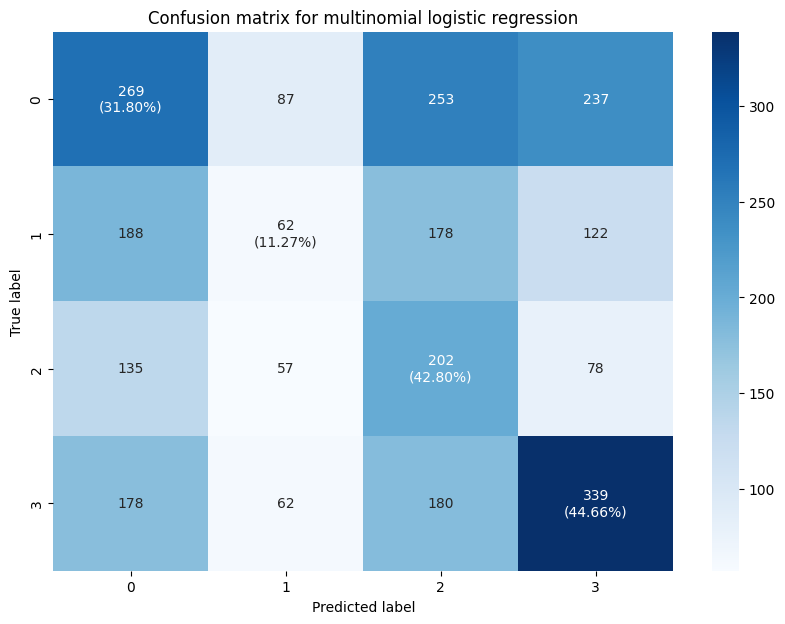

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(log_reg_cm,annot=log_reg_cm_with_accuracy,fmt='',cmap='Blues',cbar=True)
plt.title('Confusion matrix for multinomial logistic regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
log_reg_train_accuracy = accuracy_score(y_train,y_train_pred_log_reg)
log_reg_train_f1_score = f1_score(y_train,y_train_pred_log_reg,average='macro')
log_reg_test_accuracy = accuracy_score(y_test,y_test_pred_log_reg)
log_reg_test_f1_score = f1_score(y_test,y_test_pred_log_reg, average='macro')

In [ ]:
log_reg_metrics = pd.DataFrame({
    'Train Accuracy': [log_reg_train_accuracy],
    'Train F1 score':[log_reg_train_f1_score],
    'Test Accuracy':[log_reg_test_accuracy],
    'Test F1 score': [log_reg_test_f1_score]
})
log_reg_metrics

,Train Accuracy,Train F1 score,Test Accuracy,Test F1 score
0,0.511527,0.483371,0.331938,0.31015


Support vector machines with linear kernel

In [ ]:
svm_clf = SVC(kernel='linear',random_state = 42)
svm_param_grid = {
    'C':[.1,1]
}
svm_grid_search = GridSearchCV(estimator=svm_clf, param_grid=svm_param_grid,cv=5)
svm_grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [0.1, 1]})

In [ ]:
print("Best hyperparameters:", svm_grid_search.best_params_)

Best hyperparameters: {'C': 1}


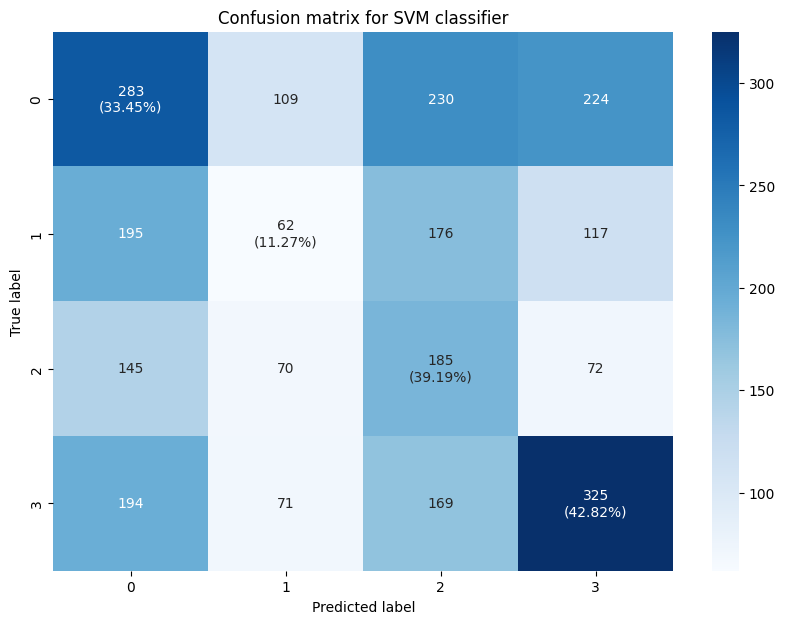

In [ ]:
best_svm_clf = SVC(kernel='linear',C=1,random_state=42,probability=True)
best_svm_clf.fit(X_train_scaled,y_train)
y_train_pred_svm = best_svm_clf.predict(X_train_scaled)
y_test_pred_svm = best_svm_clf.predict(X_test_scaled)

svm_cm = confusion_matrix(y_test,y_test_pred_svm)
svm_cm = pd.DataFrame(svm_cm,index=np.unique(y_test),columns = np.unique(y_test))

svm_classwise_accuracy = np.diag(svm_cm) / np.sum(svm_cm, axis=1)
svm_cm_with_accuracy = svm_cm.astype(str)
for i, accuracy in enumerate(svm_classwise_accuracy):
    svm_cm_with_accuracy.iloc[i, i] = f"{svm_cm.iloc[i, i]}\n({accuracy:.2%})"



plt.figure(figsize = (10,7))
sns.heatmap(svm_cm,annot=svm_cm_with_accuracy,fmt='',cmap='Blues',cbar=True)
plt.title('Confusion matrix for SVM classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
svm_train_accuracy = accuracy_score(y_train,y_train_pred_svm)
svm_train_f1_score = f1_score(y_train,y_train_pred_svm,average='macro')
svm_test_accuracy = accuracy_score(y_test,y_test_pred_svm)
svm_test_f1_score = f1_score(y_test,y_test_pred_svm,average='macro')

In [ ]:
svm_metrics = pd.DataFrame({
    'Train Accuracy': [svm_train_accuracy],
    'Train F1 Score': [svm_train_f1_score],
    'Test Accuracy': [svm_test_accuracy],
    'Test F1 Score': [svm_test_f1_score]
})

svm_metrics

,Train Accuracy,Train F1 Score,Test Accuracy,Test F1 Score
0,0.508552,0.484247,0.325466,0.304682


SVM non linear

In [ ]:
svm_non_linear = SVC(kernel='rbf', C=1, gamma='scale', random_state=42,probability=True)
svm_non_linear.fit(X_train_scaled, y_train)

y_train_pred_svm_non_linear = svm_non_linear.predict(X_train_scaled)
y_test_pred_svm_non_linear = svm_non_linear.predict(X_test_scaled)


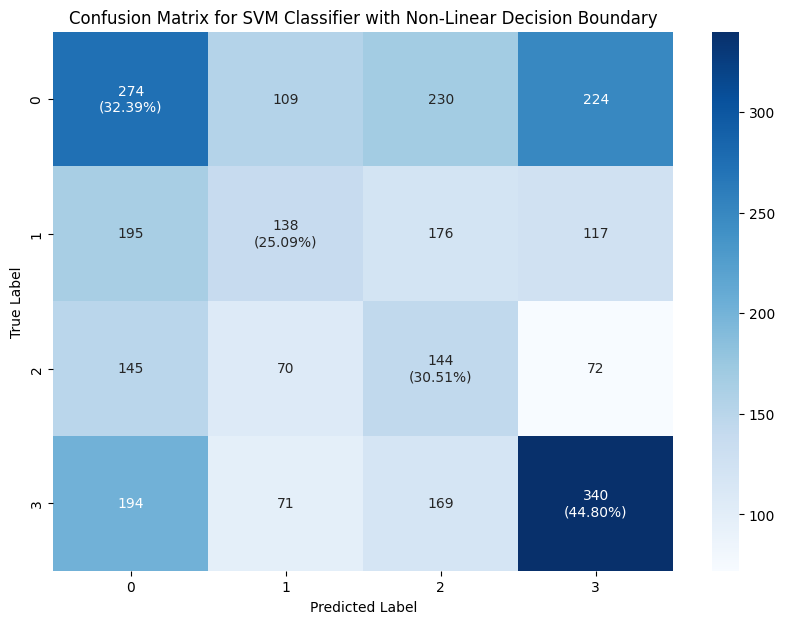

In [ ]:
svm_cm_non_linear = confusion_matrix(y_test, y_test_pred_svm_non_linear)
svm_cm_non_linear= pd.DataFrame(svm_cm_non_linear, index=np.unique(y_test), columns=np.unique(y_test))

non_linear_svm_classwise_accuracy = np.diag(svm_cm_non_linear) / np.sum(svm_cm_non_linear, axis=1)
non_linear_svm_cm_with_accuracy = svm_cm.astype(str)
for i, accuracy in enumerate(non_linear_svm_classwise_accuracy):
    non_linear_svm_cm_with_accuracy.iloc[i, i] = f"{svm_cm_non_linear.iloc[i, i]}\n({accuracy:.2%})"


plt.figure(figsize=(10, 7))
sns.heatmap(svm_cm_non_linear, annot=non_linear_svm_cm_with_accuracy, fmt='', cmap='Blues', cbar=True)
plt.title('Confusion Matrix for SVM Classifier with Non-Linear Decision Boundary')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
svm_non_linear_train_accuracy = accuracy_score(y_train, y_train_pred_svm_non_linear)
svm_non_linear_train_f1_score = f1_score(y_train, y_train_pred_svm_non_linear, average='macro')
svm_non_linear_test_accuracy = accuracy_score(y_test, y_test_pred_svm_non_linear)
svm_non_linear_test_f1_score = f1_score(y_test, y_test_pred_svm_non_linear, average='macro')

svm_metrics = pd.DataFrame({
    'Train Accuracy': [svm_non_linear_train_accuracy],
    'Train F1 Score': [svm_non_linear_train_f1_score],
    'Test Accuracy': [svm_non_linear_test_accuracy],
    'Test F1 Score': [svm_non_linear_test_f1_score]
})

svm_metrics

,Train Accuracy,Train F1 Score,Test Accuracy,Test F1 Score
0,0.571765,0.560443,0.341073,0.329849


In [ ]:

knn_clf = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
}
knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_param_grid, cv=5)
knn_grid_search.fit(X_train_scaled, y_train)
print("Best hyperparameters:", knn_grid_search.best_params_)

Best hyperparameters: {'n_neighbors': 7}


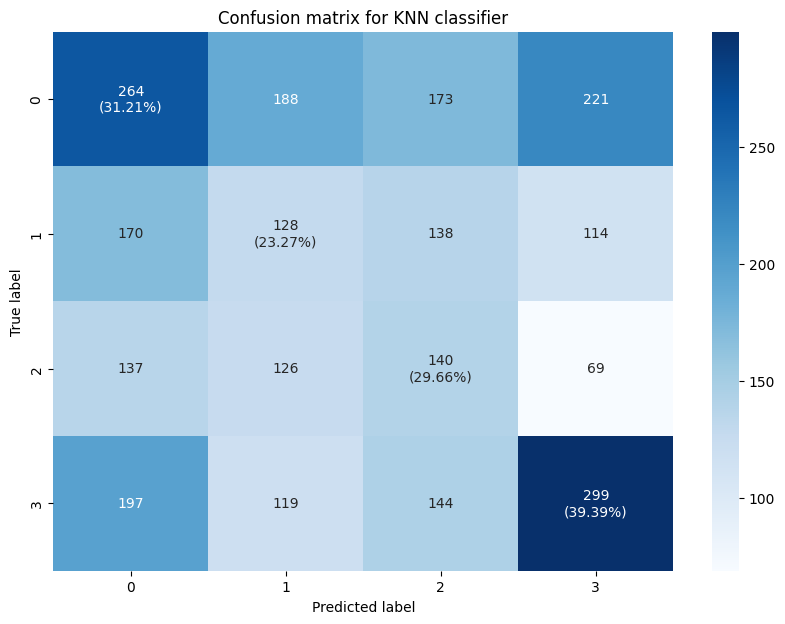

In [ ]:
best_knn_clf = KNeighborsClassifier(n_neighbors=7)
best_knn_clf.fit(X_train_scaled, y_train)
y_train_pred_knn = best_knn_clf.predict(X_train_scaled)
y_test_pred_knn = best_knn_clf.predict(X_test_scaled)
knn_cm = confusion_matrix(y_test, y_test_pred_knn)
knn_cm = pd.DataFrame(knn_cm, index=np.unique(y_test), columns=np.unique(y_test))

knn_class_accuracy = np.diag(knn_cm) / np.sum(knn_cm, axis=1)
knn_class_accuracy_df = pd.DataFrame(np.zeros(knn_cm.shape), index=np.unique(y_test), columns=np.unique(y_test))

knn_cm_with_accuracy =  knn_cm.astype(str)
for i, accuracy in enumerate(knn_class_accuracy):
    knn_cm_with_accuracy.iloc[i, i] = f"{knn_cm.iloc[i, i]}\n({accuracy:.2%})"


plt.figure(figsize=(10, 7))
sns.heatmap(knn_cm, annot=knn_cm_with_accuracy, fmt='', cmap='Blues', cbar=True)
plt.title('Confusion matrix for KNN classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
knn_train_accuracy = accuracy_score(y_train, y_train_pred_knn)
knn_train_f1_score = f1_score(y_train, y_train_pred_knn, average='macro')
knn_test_accuracy = accuracy_score(y_test, y_test_pred_knn)
knn_test_f1_score = f1_score(y_test, y_test_pred_knn, average='macro')

In [ ]:
knn_metrics = pd.DataFrame({
    'Train Accuracy': [knn_train_accuracy],
    'Train F1 Score': [knn_train_f1_score],
    'Test Accuracy': [knn_test_accuracy],
    'Test F1 Score': [knn_test_f1_score]
})

knn_metrics

,Train Accuracy,Train F1 Score,Test Accuracy,Test F1 Score
0,0.606966,0.601467,0.31633,0.307252


Ensemble learning methods

Random forest model

In [ ]:
param_grid = {
    'n_estimators':[100,200,300],
    "max_depth": [10,20,30],
    "min_samples_split":[2,5,10]
}
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator = rf_clf,param_grid = param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
best_rf_clf= RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators = 300,random_state=42)
best_rf_clf.fit(X_train,y_train)
y_train_pred_rf = best_rf_clf.predict(X_train)
y_test_pred_rf = best_rf_clf.predict(X_test)

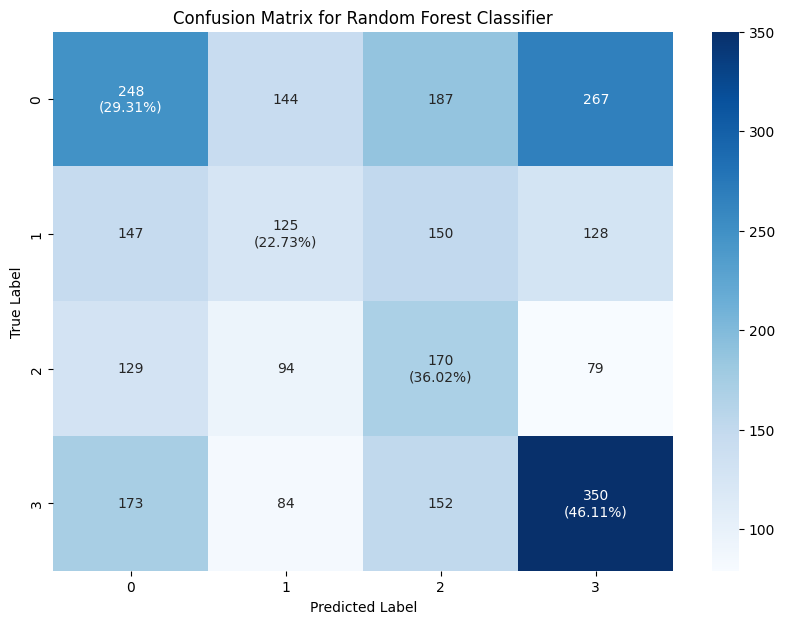

In [ ]:
rf_cm = confusion_matrix(y_test, y_test_pred_rf)
rf_cm = pd.DataFrame(rf_cm, index=np.unique(y_test), columns=np.unique(y_test))

rf_classwise_accuracy = np.diag(rf_cm) / np.sum(rf_cm, axis=1)
rf_cm_with_accuracy = rf_cm.astype(str)
for i, accuracy in enumerate(rf_classwise_accuracy):
    rf_cm_with_accuracy.iloc[i, i] = f"{rf_cm.iloc[i, i]}\n({accuracy:.2%})"

plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=rf_cm_with_accuracy, fmt='', cmap='Blues', cbar=True)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
rf_train_f1_score = f1_score(y_train, y_train_pred_rf, average='macro')
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)
rf_test_f1_score = f1_score(y_test, y_test_pred_rf, average='macro')


In [ ]:
rf_metrics = pd.DataFrame({
  'Train Accuracy': [rf_train_accuracy],
    'Train F1 Score': [rf_train_f1_score],
    'Test Accuracy': [rf_test_accuracy],
    'Test F1 Score': [rf_test_f1_score]
})

In [ ]:
rf_metrics

,Train Accuracy,Train F1 Score,Test Accuracy,Test F1 Score
0,0.655181,0.641118,0.339931,0.328755


XGBoost

In [ ]:
xgb_param_grid = {
    'n_estimators':[100,300,500],
    'max_depth':[6,10,20]
}
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_grid_search = GridSearchCV(estimator = xgb_clf,param_grid=xgb_param_grid,cv=5)
xgb_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'max_depth': [6, 10, 20],
                         'n_estimators': [100, 300, 500]})

In [ ]:
print("Best hyperparameters:", xgb_grid_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 100}


In [ ]:
best_xgb_clf = xgb.XGBClassifier(random_state = 42)
best_xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_train_pred_xgb = best_xgb_clf.predict(X_train)
y_test_pred_xgb = best_xgb_clf.predict(X_test)

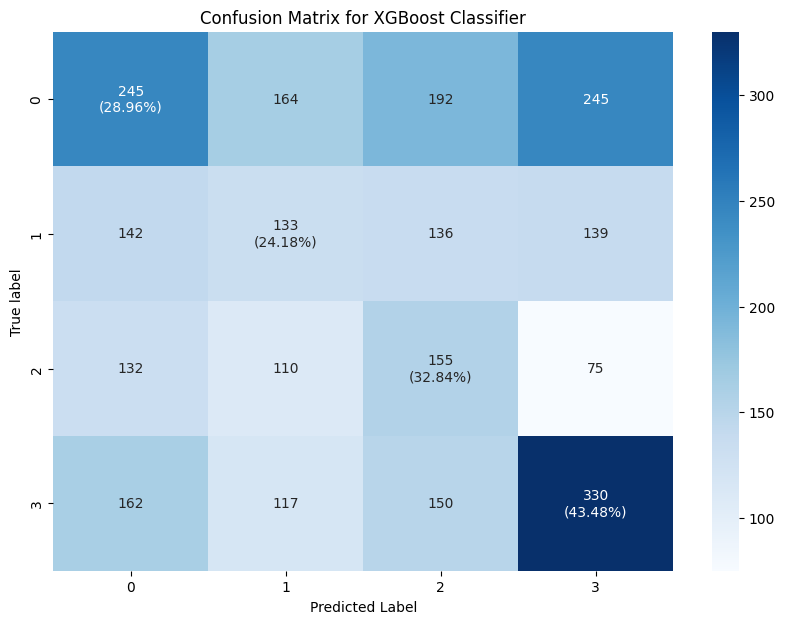

In [ ]:
xgb_cm = confusion_matrix(y_test,y_test_pred_xgb)
xgb_cm = pd.DataFrame(xgb_cm,index= np.unique(y_test),columns = np.unique(y_test))

xgb_classwise_accuracy = np.diag(xgb_cm) / np.sum(xgb_cm, axis=1)
xgb_cm_with_accuracy = xgb_cm.astype(str)
for i, accuracy in enumerate(xgb_classwise_accuracy):
    xgb_cm_with_accuracy.iloc[i, i] = f"{xgb_cm.iloc[i, i]}\n({accuracy:.2%})"


plt.figure(figsize = (10,7))
sns.heatmap(xgb_cm,annot=xgb_cm_with_accuracy,fmt = '',cmap='Blues',cbar = True)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.show()

In [ ]:
xgb_train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
xgb_train_f1_score = f1_score(y_train, y_train_pred_xgb, average='macro')
xgb_test_accuracy = accuracy_score(y_test, y_test_pred_xgb)
xgb_test_f1_score = f1_score(y_test, y_test_pred_xgb, average='macro')

xgb_metrics = pd.DataFrame({
'Train Accuracy': [xgb_train_accuracy],
    'Train F1 Score': [xgb_train_f1_score],
    'Test Accuracy': [xgb_test_accuracy],
    'Test F1 Score': [xgb_test_f1_score]
})

xgb_metrics


,Train Accuracy,Train F1 Score,Test Accuracy,Test F1 Score
0,0.746158,0.738788,0.328512,0.318866


AdaBoost

In [ ]:
ada_clf = AdaBoostClassifier(random_state=42)
ada_param_grid={
    'n_estimators':[50,300,500],
    'learning_rate':[.3,.5,1.0]
}

In [ ]:
ada_clf.fit(X_train,y_train)
y_train_pred_ada = ada_clf.predict(X_train)
y_test_pred_ada = ada_clf.predict(X_test)


In [ ]:
ada_grid_search = GridSearchCV(estimator = ada_clf, param_grid = ada_param_grid,cv=5 )
ada_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.3, 0.5, 1.0],
                         'n_estimators': [50, 300, 500]})

In [ ]:
print("Best hyperparameters:", ada_grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.5, 'n_estimators': 300}


In [ ]:
best_ada_clf = AdaBoostClassifier(random_state=42,learning_rate=.5,n_estimators=300)
best_ada_clf.fit(X_train,y_train)
y_train_pred_ada = best_ada_clf.predict(X_train)
y_test_pred_ada = best_ada_clf.predict(X_test)

ada_cm = confusion_matrix(y_test,y_test_pred_ada)
ada_cm = pd.DataFrame(ada_cm,index=np.unique(y_test),columns = np.unique(y_test))

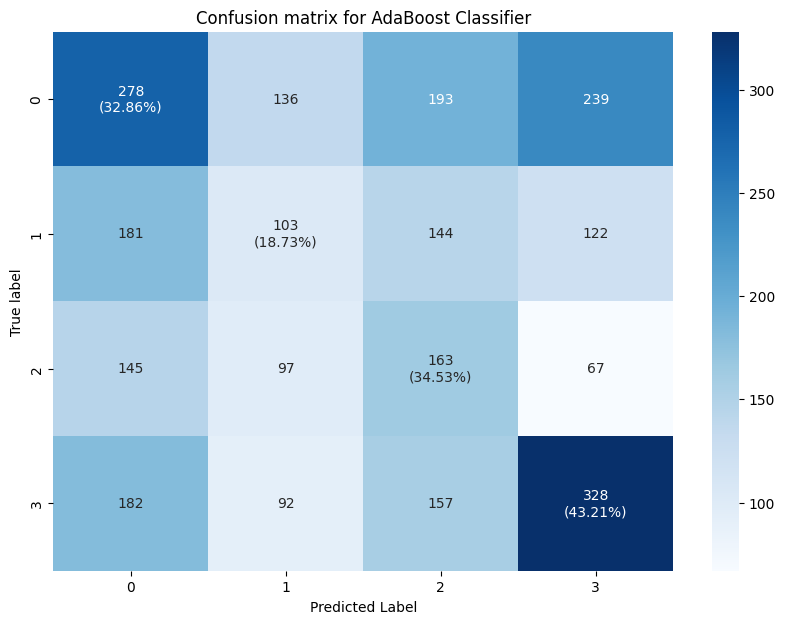

In [ ]:
ada_classwise_accuracy = np.diag(ada_cm) / np.sum(ada_cm, axis=1)
ada_cm_with_accuracy = ada_cm.astype(str)
for i, accuracy in enumerate(ada_classwise_accuracy):
    ada_cm_with_accuracy.iloc[i, i] = f"{ada_cm.iloc[i, i]}\n({accuracy:.2%})"

plt.figure(figsize=(10,7))
sns.heatmap(ada_cm,annot=ada_cm_with_accuracy,fmt='',cmap='Blues',cbar=True)
plt.title('Confusion matrix for AdaBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.show()

In [ ]:
ada_train_accuracy = accuracy_score(y_train, y_train_pred_ada)
ada_train_f1_score = f1_score(y_train, y_train_pred_ada, average='macro')
ada_test_accuracy = accuracy_score(y_test, y_test_pred_ada)
ada_test_f1_score = f1_score(y_test, y_test_pred_ada, average='macro')

ada_metrics = pd.DataFrame({
    'Train Accuracy': [ada_train_accuracy],
    'Train F1 Score': [ada_train_f1_score],
    'Test Accuracy': [ada_test_accuracy],
    'Test F1 Score': [ada_test_f1_score]
})

ada_metrics

,Train Accuracy,Train F1 Score,Test Accuracy,Test F1 Score
0,0.520575,0.505136,0.331938,0.318269


Gradinet Boosting Classifier

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_param_grid ={
    'n_estimators':[100,200],
    'learning_rate':[.1,.2],
    'max_depth':[3,5]
}

In [ ]:
gb_grid_search = GridSearchCV(estimator = gb_clf,param_grid=gb_param_grid,cv=5)
gb_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]})

In [ ]:
print("Best hyperparameters:", gb_grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


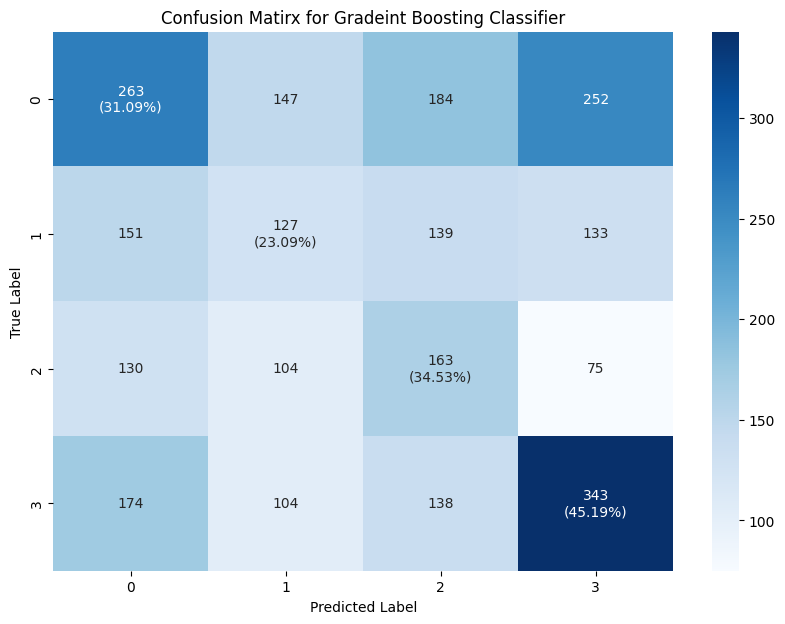

In [ ]:
best_gb_clf = GradientBoostingClassifier(random_state=42,learning_rate=.1,max_depth=3,n_estimators=200)
best_gb_clf.fit(X_train,y_train)
y_train_pred_gb = best_gb_clf.predict(X_train)
y_test_pred_gb = best_gb_clf.predict(X_test)

gb_cm = confusion_matrix(y_test,y_test_pred_gb)
gb_cm = pd.DataFrame(gb_cm,index=np.unique(y_test),columns = np.unique(y_test))

gb_classwise_accuracy = np.diag(gb_cm) / np.sum(gb_cm, axis=1)
gb_cm_with_accuracy = gb_cm.astype(str)  # Convert to string type
for i, accuracy in enumerate(gb_classwise_accuracy):
    gb_cm_with_accuracy.iloc[i, i] = f"{gb_cm.iloc[i, i]}\n({accuracy:.2%})"

plt.figure(figsize=(10,7))
sns.heatmap(gb_cm,annot=gb_cm_with_accuracy,fmt='',cmap='Blues',cbar=True)
plt.title('Confusion Matirx for Gradeint Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
gb_train_accuracy = accuracy_score(y_train,y_train_pred_gb)
gb_train_f1_score = f1_score(y_train,y_train_pred_gb,average='macro')
gb_test_accuracy = accuracy_score(y_test,y_test_pred_gb)
gb_test_f1_score = f1_score(y_test,y_test_pred_gb,average='macro')

In [ ]:
gb_metrics = pd.DataFrame({
    'Train Accuracy': [gb_train_accuracy],
    'Train F1 Score': [gb_train_f1_score],
    'Test Accuracy': [gb_test_accuracy],
    'Test F1 Score': [gb_test_f1_score]
})

In [ ]:
gb_metrics

,Train Accuracy,Train F1 Score,Test Accuracy,Test F1 Score
0,0.600645,0.588976,0.341073,0.329767


AUC ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay

In [ ]:
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

In [ ]:
trained_classifiers = {
    'Multinomial':log_reg_clf,
    'SVM linear':best_svm_clf,
    'SVM non linear': svm_non_linear,
    'KNN': best_knn_clf,
    'Random Forest': best_rf_clf,
    'XGBoost': best_xgb_clf,
    'AdaBoost': best_ada_clf,
    'Gradient Boosting': best_gb_clf
}


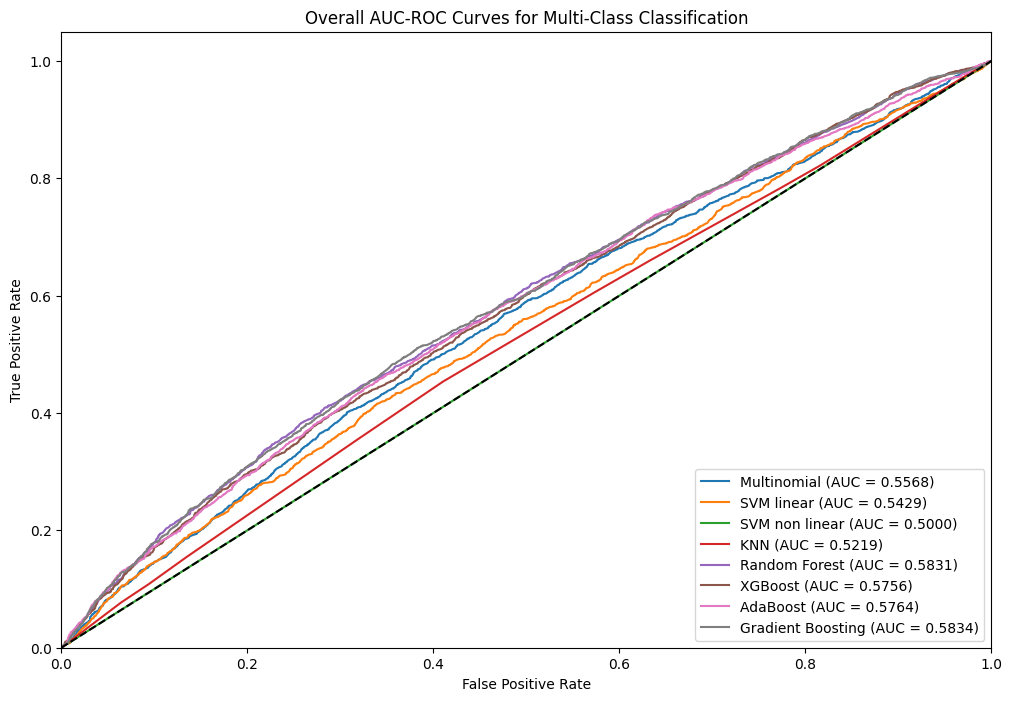

In [ ]:
plt.figure(figsize=(12, 8))

for clf_name, clf in trained_classifiers.items():
    # Predict probabilities
    y_score = clf.predict_proba(X_test)

    # Compute the overall AUC-ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_bin.shape[1])]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(y_test_bin.shape[1]):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= y_test_bin.shape[1]

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    plt.plot(fpr["macro"], tpr["macro"],
             label=f'{clf_name} (AUC = {roc_auc["macro"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall AUC-ROC Curves for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

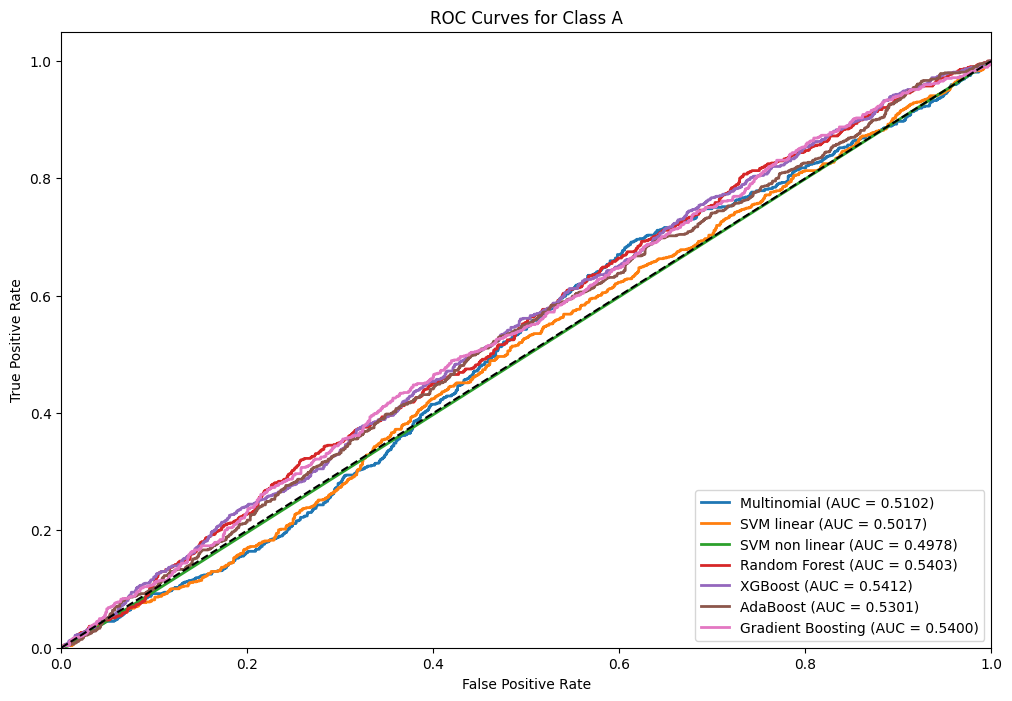

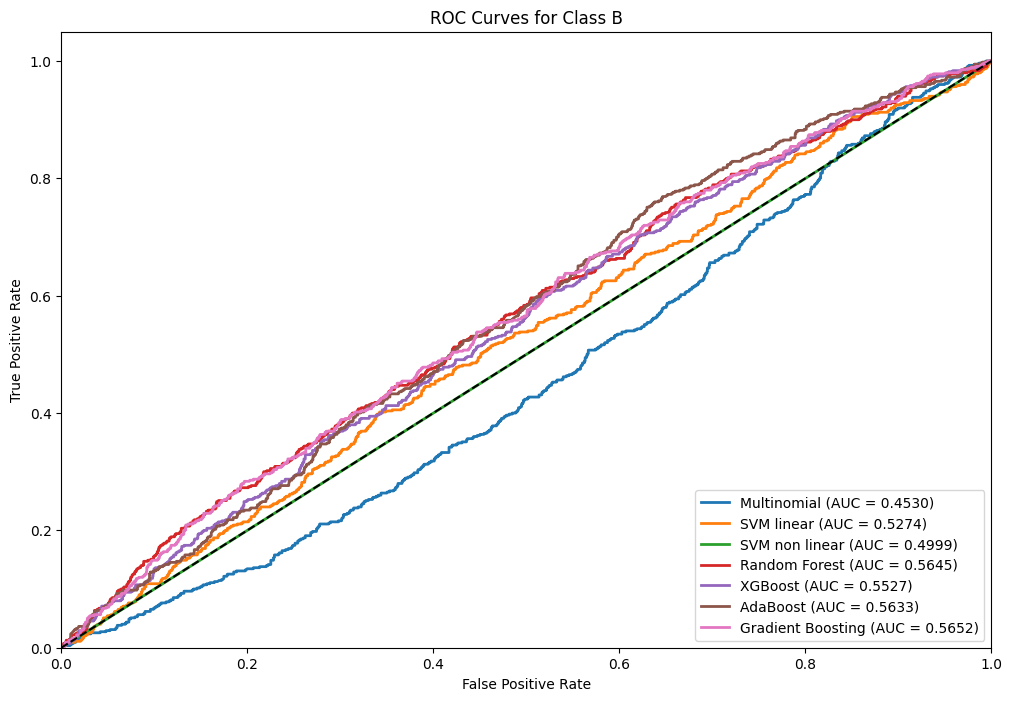

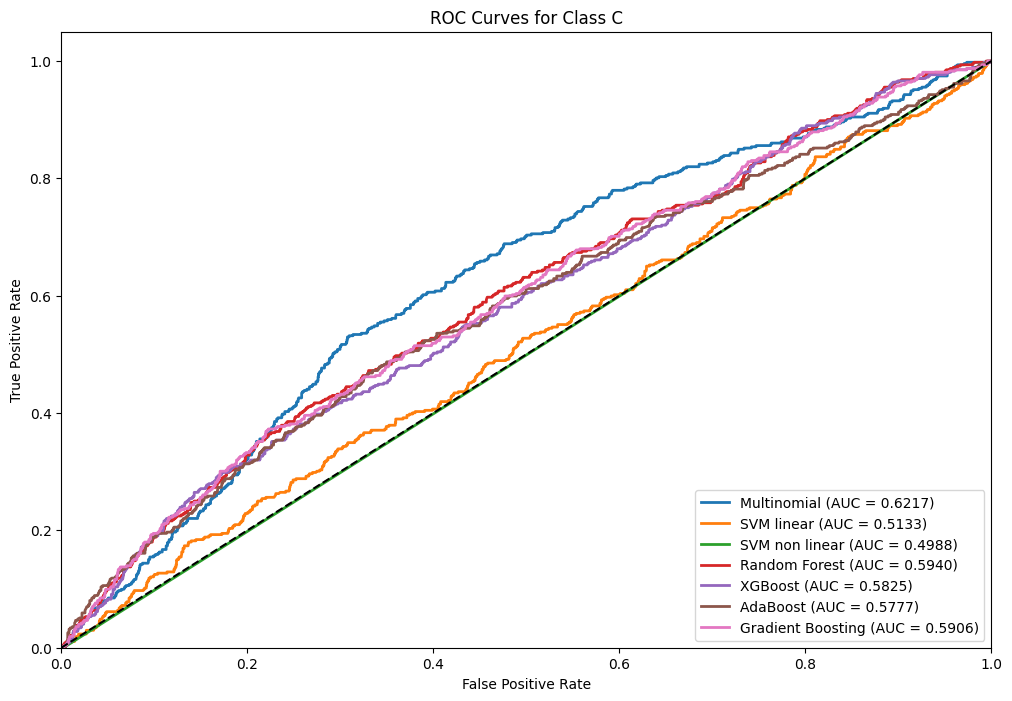

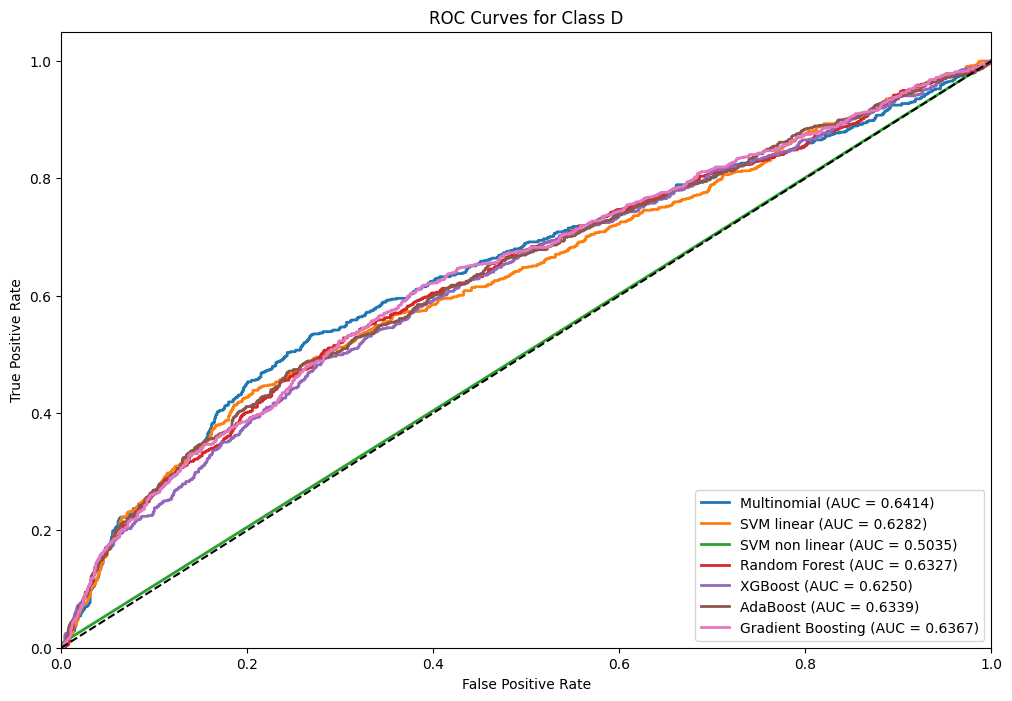

In [ ]:
classes={0:'A',1:'B',2:'C',3:'D'}
for i in range(y_test_bin.shape[1]):
    plt.figure(figsize=(12, 8))

    # Loop through each classifier
    for clf_name, clf in trained_classifiers.items():
        # Predict probabilities
        y_score = clf.predict_proba(X_test)

        # Compute ROC curve and AUC for the current class
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve for the current class
        plt.plot(fpr, tpr, lw=2, label=f'{clf_name} (AUC = {roc_auc:.4f})')

    # Plot formatting for the current class
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for Class {classes[i]}')
    plt.legend(loc='lower right')
    plt.show()

Feature importance plots

In [ ]:
importances= best_gb_clf.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = X_train.columns
df_importances = pd.DataFrame({
    'Feature':feature_names[indices],
    'Importance': importances[indices]
})

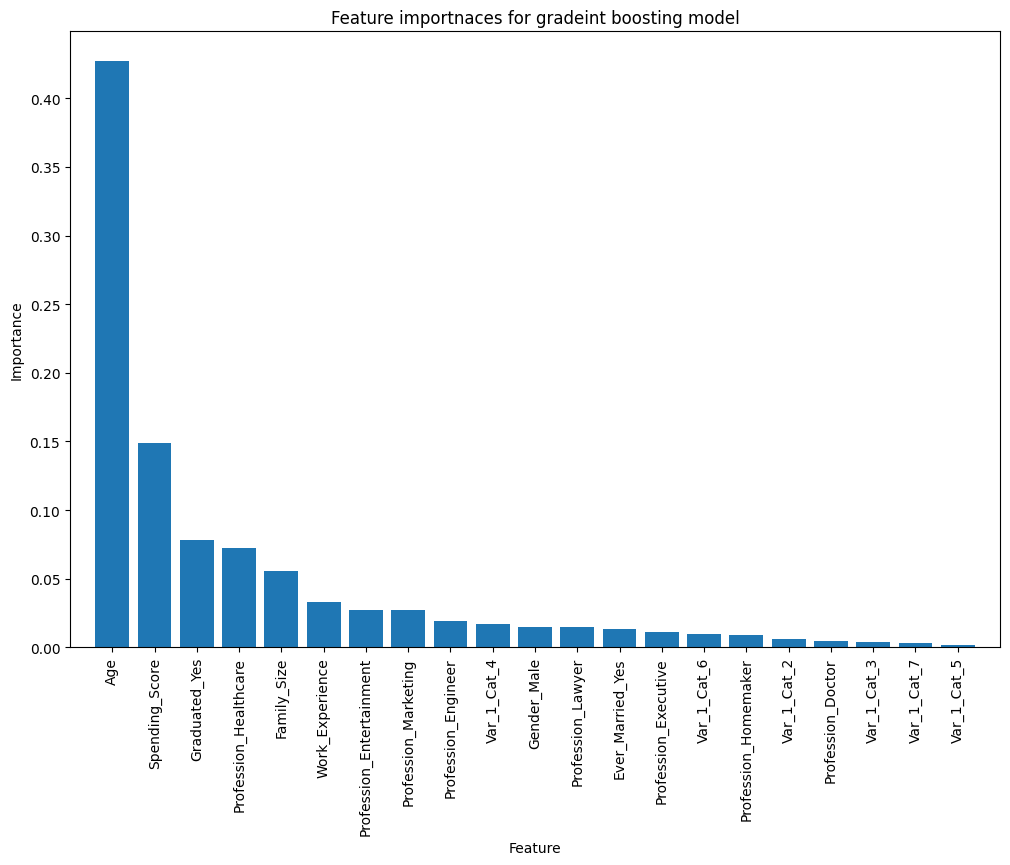

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Feature importnaces for gradeint boosting model')
plt.bar(range(X_train.shape[1]),importances[indices],align = 'center')
plt.xticks(range(X_train.shape[1]),feature_names[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [ ]:
top_5_indices = indices[:5]
X_train_top5=X_train.iloc[:,top_5_indices]
X_test_top5=X_test.iloc[:,top_5_indices]

In [ ]:

gb_clf = GradientBoostingClassifier(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5]
}

gb_grid_search = GridSearchCV(estimator=gb_clf, param_grid=gb_param_grid, cv=5)
gb_grid_search.fit(X_train_top5, y_train)

print("Best hyperparameters:", gb_grid_search.best_params_)


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


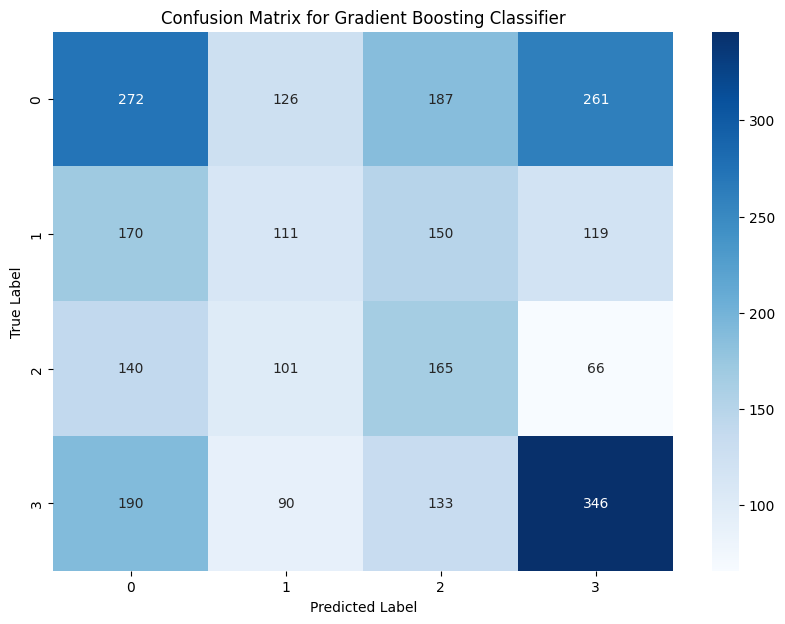

,Train Accuracy,Train F1 Score,Test Accuracy,Test F1 Score
0,0.526648,0.510189,0.340312,0.32687


In [ ]:

top_gb_clf = GradientBoostingClassifier(random_state=42,learning_rate=.1,max_depth=3,n_estimators=100)
top_gb_clf.fit(X_train_top5, y_train)

# Make predictions
y_train_pred_top_gb = top_gb_clf.predict(X_train_top5)
y_test_pred_top_gb = top_gb_clf.predict(X_test_top5)

# Evaluate performance
top_gb_cm = confusion_matrix(y_test, y_test_pred_top_gb)
top_gb_cm = pd.DataFrame(top_gb_cm, index=np.unique(y_test), columns=np.unique(y_test))

plt.figure(figsize=(10, 7))
sns.heatmap(top_gb_cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

top_gb_train_accuracy = accuracy_score(y_train, y_train_pred_top_gb)
top_gb_train_f1_score = f1_score(y_train, y_train_pred_top_gb, average='macro')
top_gb_test_accuracy = accuracy_score(y_test, y_test_pred_top_gb)
top_gb_test_f1_score = f1_score(y_test, y_test_pred_top_gb, average='macro')

gb_metrics = pd.DataFrame({
    'Train Accuracy': [top_gb_train_accuracy],
    'Train F1 Score': [top_gb_train_f1_score],
    'Test Accuracy': [top_gb_test_accuracy],
    'Test F1 Score': [top_gb_test_f1_score]
})

gb_metrics


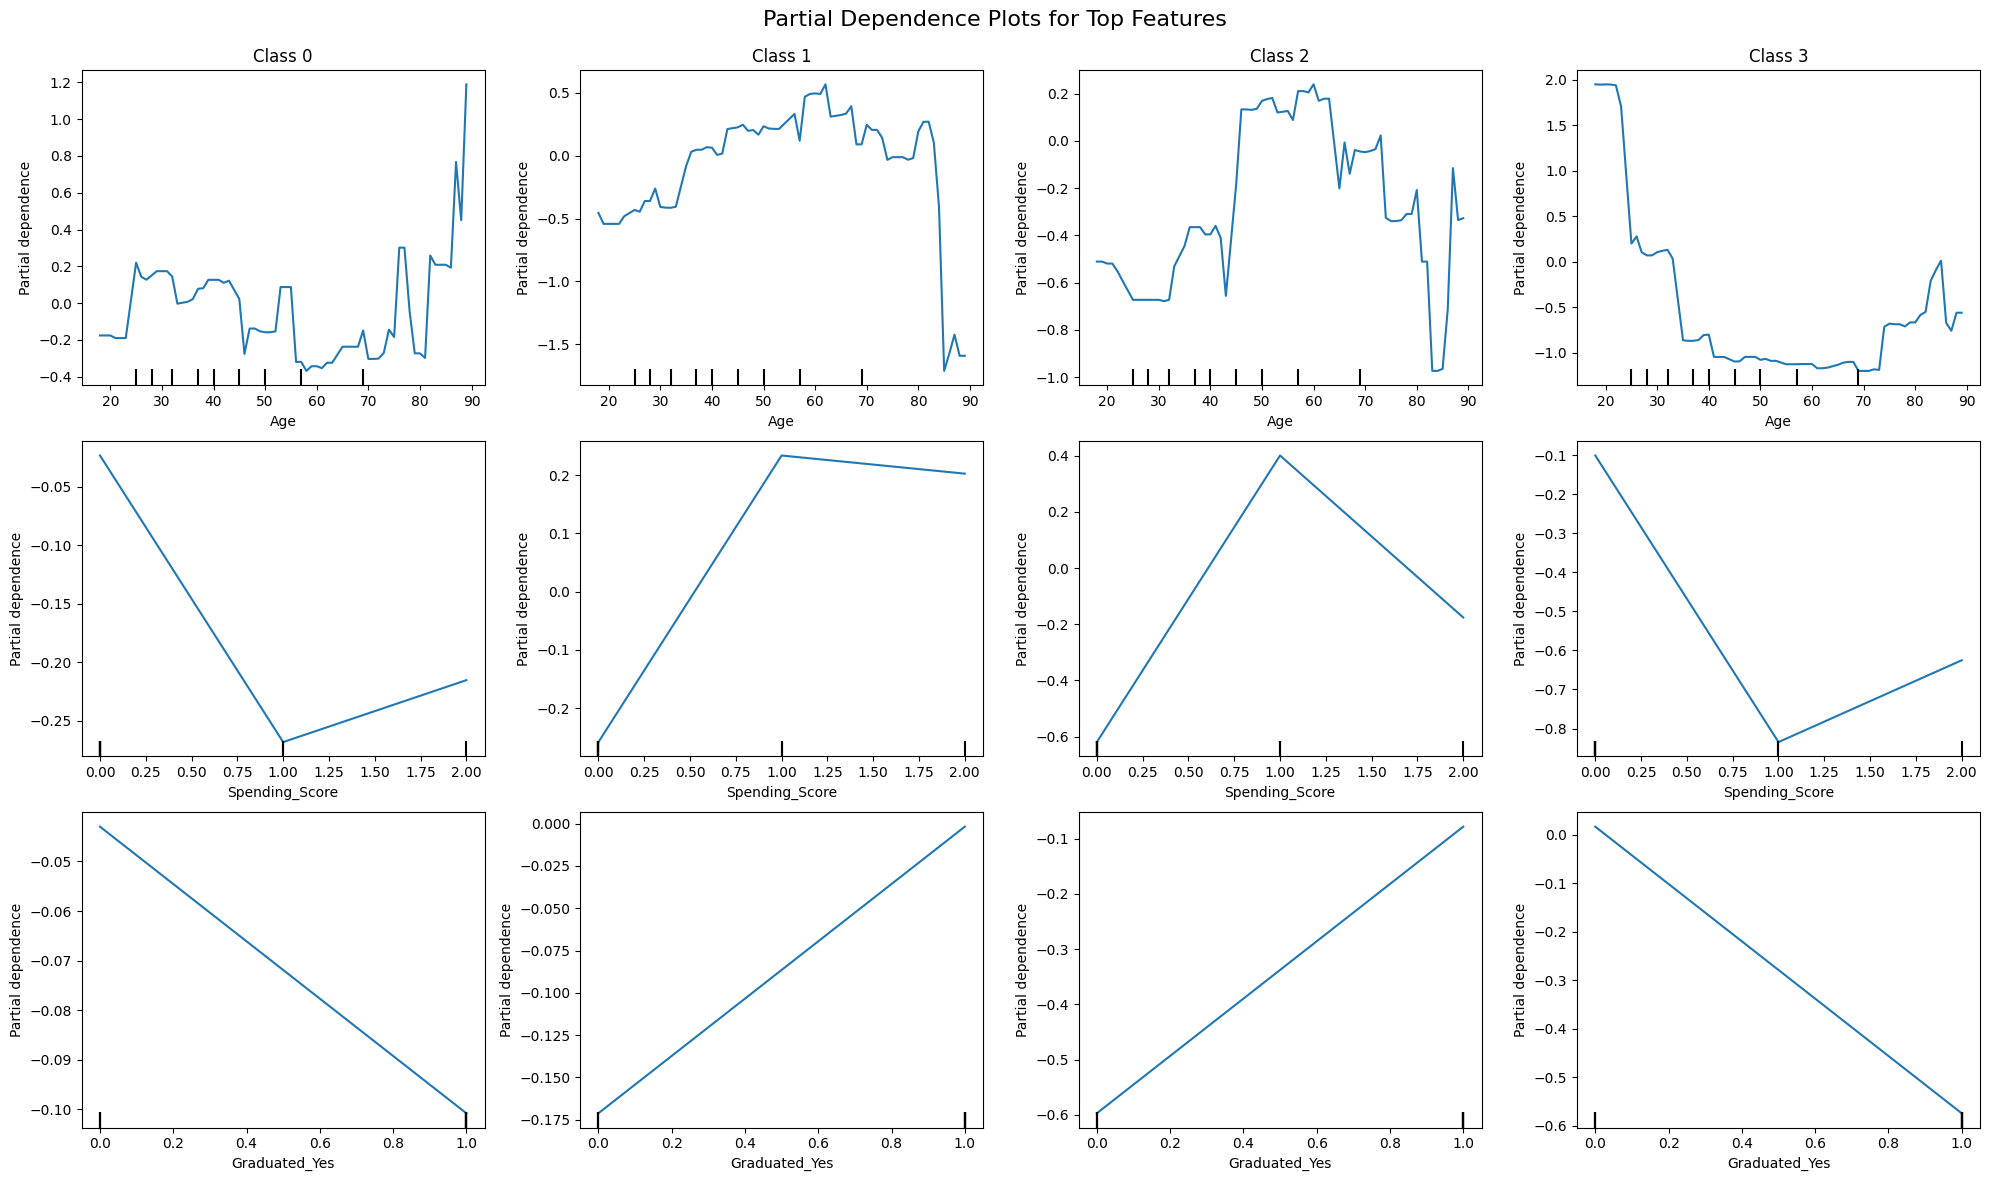

In [ ]:
top_features_idx = indices[:3]
top_features = feature_names[top_features_idx]
fig, axes = plt.subplots(nrows=len(top_features), ncols=len(np.unique(y_train)), figsize=(20, 12), sharex='col', sharey='row')


axes = axes.flatten()


for i, feature_idx in enumerate(top_features_idx):
    for j, target_class in enumerate(np.unique(y_train)):
        ax = axes[i * len(np.unique(y_train)) + j]


        display = PartialDependenceDisplay.from_estimator(
            best_gb_clf, X_train, features=[feature_idx],
            target=target_class,
            ax=ax
        )


        if j == 0:
            ax.set_ylabel(top_features[i])
        if i == len(top_features) - 1:
            ax.set_xlabel('Feature Value')
        ax.set_xticks([])
        ax.set_yticks([])


for j, target_class in enumerate(np.unique(y_train)):
    axes[j].set_title(f'Class {target_class}', fontsize=12)


plt.tight_layout()
plt.suptitle('Partial Dependence Plots for Top Features', fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()